In [1]:
import os
import sys

# 1. IMMEDIATE STABILITY FIX
# This MUST be the very first thing that runs to prevent the crash
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["OMP_NUM_THREADS"] = "1"

# 2. Add the Root Directory to System Path
# Going up two levels from 'notebooks' to find 'venv' and modules
root_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if root_path not in sys.path:
    sys.path.append(root_path)

# 3. DELAYED IMPORTS
# We use a try-except to catch the crash if the memory is still 'poisoned'
try:
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    sns.set_theme(style="darkgrid")
    print(f"✅ Active Interpreter: {sys.executable}")
    print("✅ Financial Analysis Modules Loaded Successfully.")
except Exception as e:
    print(f"❌ Error during load: {e}")

✅ Active Interpreter: c:\datascience_portfolio\venv\Scripts\python.exe
✅ Financial Analysis Modules Loaded Successfully.


In [2]:
# Path logic: go up to project root, then into data
data_path = os.path.join('..', 'data', 'stock_prices.csv')

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    # Essential: Convert Date to datetime objects for time-series plotting
    df['Date'] = pd.to_datetime(df['Date'])
    print("Stock Price Data Loaded Successfully")
    display(df.head())
else:
    print(f"Error: File not found at {os.path.abspath(data_path)}")

Stock Price Data Loaded Successfully


,Date,Ticker,Open,High,Low,Close,Volume
0,2026-01-12,AAPL,185.0,187.5,184.2,186.1,52000000
1,2026-01-13,AAPL,186.5,188.9,186.0,188.2,48000000
2,2026-01-14,AAPL,188.0,189.5,187.1,187.9,45000000
3,2026-01-12,TSLA,210.0,215.0,208.5,214.2,95000000
4,2026-01-13,TSLA,214.5,220.2,213.1,218.5,98000000


In [3]:
# Sort by Ticker and Date to ensure calculations are sequential
df = df.sort_values(['Ticker', 'Date'])

# 1. Calculate Daily Percentage Return (Market Risk Metric)
df['Daily_Return'] = df.groupby('Ticker')['Close'].pct_change() * 100

# 2. Calculate 3-Day Moving Average (Trend Smoothing)
df['MA_3Day'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(window=3).mean())

# 3. Risk Assessment: Standard Deviation of Returns (Volatility)
volatility = df.groupby('Ticker')['Daily_Return'].std()
print("\nRisk Assessment: Volatility by Ticker (%)")
print(volatility)


Risk Assessment: Volatility by Ticker (%)
Ticker
AAPL     0.910634
GOOGL    0.092588
TSLA     2.099095
Name: Daily_Return, dtype: float64


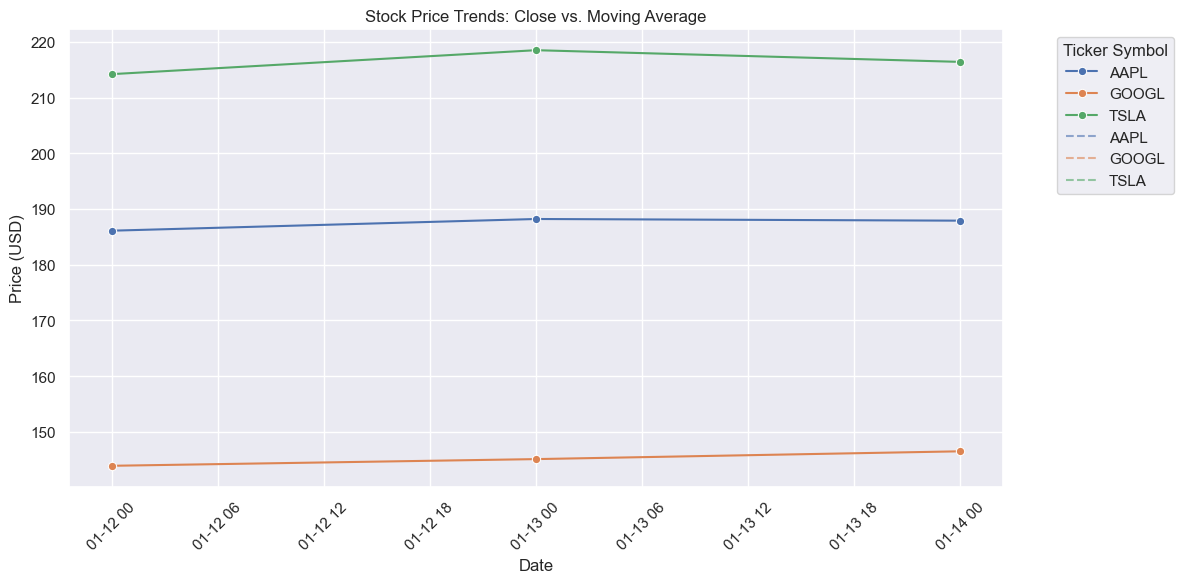

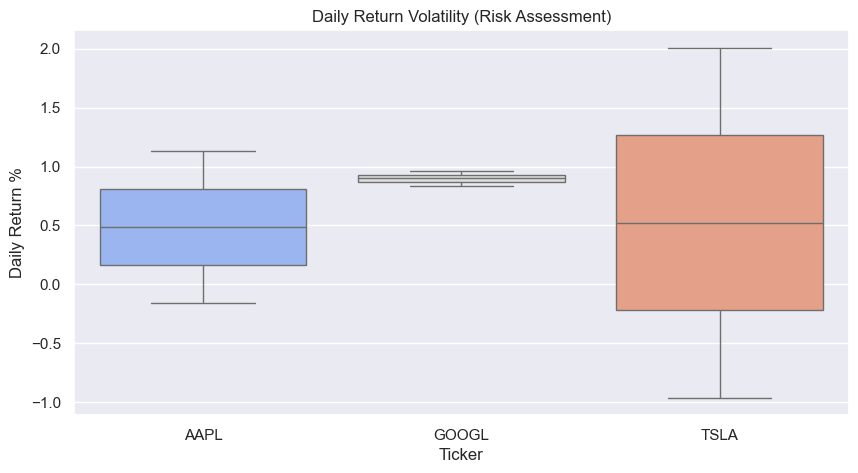

In [ ]:
# Create visualization folder if it doesn't exist
viz_path = '../visualizations/'
os.makedirs(viz_path, exist_ok=True)

# Chart 1: Price Trends with Moving Averages
plt.figure(figsize=(12, 6))
# Removed manual 'label' to prevent conflict with 'hue'
sns.lineplot(data=df, x='Date', y='Close', hue='Ticker', marker='o')
sns.lineplot(data=df, x='Date', y='MA_3Day', hue='Ticker', linestyle='--', alpha=0.6)

plt.title('Stock Price Trends: Close vs. Moving Average')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
# bbox_to_anchor keeps the legend from overlapping the chart
plt.legend(title='Ticker Symbol', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig(os.path.join(viz_path, 'stock_price_trends_MA.png'))
plt.show()

# Chart 2: Daily Return Volatility (Risk Assessment)
plt.figure(figsize=(10, 5))
# Added 'hue' to boxplot to avoid the palette warning in newer Seaborn versions
sns.boxplot(data=df, x='Ticker', y='Daily_Return', hue='Ticker', palette='coolwarm', legend=False)
plt.title('Daily Return Volatility (Risk Assessment)')
plt.ylabel('Daily Return %')
plt.savefig(os.path.join(viz_path, 'stock_risk_volatility.png'))
plt.show()